In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io 
import scipy.optimize as opt
from scipy import stats

#### Data

In [16]:
data=scipy.io.loadmat('digits.mat')
data
yarr=np.array(data['X'])
xarr=np.array(data['y'])
#X = data['X']
#y = data['y']
x = data['X'] 
y = np.squeeze(data['y']) 
np.place(y, y == 10, 0) 
numExamples = x.shape[0] # 5000 
numFeatures = x.shape[1] # 400 
numLabels = 10 
class_labels=np.arange(start=1,stop=11)



NameError: name 'scipy' is not defined

In [3]:
# Y shape:  (5000, 1)
# Class labels:  [ 1  2  3  4  5  6  7  8  9 10]
# X shape: (5000, 401). X[0] shape: (401,)

print("Y-shape",y)
print("x shape",x)
print(class_labels)
data['X']




Y-shape [0 0 0 ... 9 9 9]
x shape [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 1  2  3  4  5  6  7  8  9 10]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Data visualization

In [4]:
def displayData():
    d=data['X'][random.randint(0,5000)]
    d=d.reshape((20,20))
  
    plt.imshow(300-d,cmap='gray')
    
    

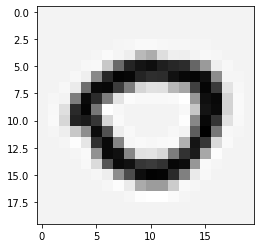

In [11]:
#plt.figure(1,figsize=(15,15))
displayData()
plt.show()

#plt.imshow(x,cmap=plt.cm.gray_r,interpolation='nearest')
#plt.show()



#### Hypothesis and cost fucntions

In [12]:
def hypo(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    pred = hypo(X @ theta)
    pred[pred == 1] = 0.999 # log(1)=0 causes error in division
    error = -y * np.log(pred) - (1 - y) * np.log(1 - pred);
    return sum(error) / len(y);





#gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#mn=np.min(y)
#mx=np.max()
#x1=np.linspace(mn,mx,500)
#y1=gradient*x1+intercept
#plt.plot(x,y,'ob')
#plt.plot(x1,y1,'-r')


#### Gradient descent algorithm

In [13]:
def cost_gradient(theta, X, y):
    pred = hypo(X @ theta);
    return X.transpose() @ (pred - y) / len(y)


#### One vs all classification

In [15]:
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

classifiers = np.zeros(shape=(numLabels, numFeatures + 1))
for c in range(0, numLabels):
    label = (y == c).astype(int)
    initial_theta = np.zeros(X.shape[1])
    classifiers[c, :] = opt.fmin_cg(cost, initial_theta, cost_gradient, (X, label), disp=0);


#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#clf.fit(X_train, y_train)

In [ ]:
#test
classProbabilities = hypo(X @ classifiers.transpose())
pred = classProbabilities.argmax(axis=1)

#### Calculate accuracy

Training set accuracy: 94.6%


In [10]:
print("acuracy:", str(100 * np.mean(pred == y)) + "%")

Training set accuracy: 98.16%
